# Rioxarray Introduction

In [1]:
import rioxarray
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif'
data=rioxarray.open_rasterio(url)
data

<xarray.DataArray (band: 7, y: 2563, x: 2485)> Size: 178MB
[44583385 values with dtype=float32]
Coordinates:
  * band         (band) int32 28B 1 2 3 4 5 6 7
  * x            (x) float64 20kB 5.824e+05 5.825e+05 ... 8.059e+05 8.06e+05
  * y            (y) float64 21kB 4.106e+06 4.105e+06 ... 3.875e+06 3.875e+06
    spatial_ref  int32 4B 0
Attributes: (12/96)
    ALGORITHM_SOURCE_SURFACE_REFLECTANCE:  LaSRC_1.6.0
    ALGORITHM_SOURCE_SURFACE_TEMPERATURE:  st_1.5.0
    CLOUD_COVER:                           0
    CLOUD_COVER_LAND:                      0
    COLLECTION_CATEGORY:                   T1
    COLLECTION_NUMBER:                     2
    ...                                    ...
    WRS_TYPE:                              2
    AREA_OR_POINT:                         Area
    _FillValue:                            -inf
    scale_factor:                          1.0
    add_offset:                            0.0
    long_name:                             ('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4...

In [3]:
# inspecting the dataset
data.dims

('band', 'y', 'x')

In [4]:
data.attrs

{'ALGORITHM_SOURCE_SURFACE_REFLECTANCE': 'LaSRC_1.6.0',
 'ALGORITHM_SOURCE_SURFACE_TEMPERATURE': 'st_1.5.0',
 'CLOUD_COVER': 0,
 'CLOUD_COVER_LAND': 0,
 'COLLECTION_CATEGORY': 'T1',
 'COLLECTION_NUMBER': 2,
 'DATA_SOURCE_AIR_TEMPERATURE': 'VIIRS',
 'DATA_SOURCE_ELEVATION': 'GLS2000',
 'DATA_SOURCE_OZONE': 'VIIRS',
 'DATA_SOURCE_PRESSURE': 'Calculated',
 'DATA_SOURCE_REANALYSIS': 'GEOS-5 IT',
 'DATA_SOURCE_WATER_VAPOR': 'VIIRS',
 'DATE_ACQUIRED': '2024-07-08',
 'DATE_PRODUCT_GENERATED': 1720562288000,
 'DATUM': 'WGS84',
 'EARTH_SUN_DISTANCE': 1.016687,
 'ELLIPSOID': 'WGS84',
 'GEOMETRIC_RMSE_MODEL': 3.828,
 'GEOMETRIC_RMSE_MODEL_X': 2.822,
 'GEOMETRIC_RMSE_MODEL_Y': 2.586,
 'GEOMETRIC_RMSE_VERIFY': 1.342,
 'GRID_CELL_SIZE_REFLECTIVE': 30,
 'GRID_CELL_SIZE_THERMAL': 30,
 'GROUND_CONTROL_POINTS_MODEL': 1015,
 'GROUND_CONTROL_POINTS_VERIFY': 244,
 'GROUND_CONTROL_POINTS_VERSION': 5,
 'IMAGE_QUALITY_OLI': 9,
 'IMAGE_QUALITY_TIRS': 9,
 'L1_DATE_PRODUCT_GENERATED': '2024-07-08T23:15:25Z',
 'L

In [5]:
data.coords

Coordinates:
  * band         (band) int32 28B 1 2 3 4 5 6 7
  * x            (x) float64 20kB 5.824e+05 5.825e+05 ... 8.059e+05 8.06e+05
  * y            (y) float64 21kB 4.106e+06 4.105e+06 ... 3.875e+06 3.875e+06
    spatial_ref  int32 4B 0

In [ ]:
# data is the data array and rio is the accessor to access the information.
data.rio.crs # rio is the accessor 
print (data.rio.crs)
# which shows the coordinate reference system

EPSG:32611


In [9]:
data.rio.transform()

Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0)

In [13]:
# To add the crs manually
data.rio.write_crs("EPSG:32611",inplace=True)
print(data.rio.crs)

EPSG:32611


Coordinate System: Defines how spatial data is represented (e.g., geographic or projected).

Geographic Coordinate System (GCS): Uses latitude/longitude (e.g., EPSG:4326 - WGS84).

Projected Coordinate System (PCS): Uses a flat 2D map (e.g., EPSG:32611 - UTM Zone 11N).

Reprojection: The process of converting coordinates from one coordinate system to another (e.g., from EPSG:4326 to EPSG:32611).

How to Identify if an EPSG Code is a Coordinate System or Reprojection?
EPSG:32611 (UTM Zone 11N) → Projected Coordinate System (PCS)

EPSG:4326 (WGS84) → Geographic Coordinate System (GCS)

The Universal Transverse Mercator (UTM) system divides the Earth into 60 zones, each 6° of longitude wide, numbered 1 to 60 (eastward from 180°W). Each zone has:

A Northern Hemisphere (N) version (EPSG:326XX)

A Southern Hemisphere (S) version (EPSG:327XX)

Examples of UTM Zones (Northern Hemisphere - EPSG:326XX)
Zone	Coverage (Longitude)	EPSG Code (North)	EPSG Code (South)
1N	    180°W to 174°W	        EPSG:32601	        EPSG:32701
2N	    174°W to 168°W	        EPSG:32602	        EPSG:32702



# How the UTM Zone are calculated
Khyber Pakhtunkhwa (KP), Pakistan, lies approximately between:

Longitude: 69°E to 74°E

Latitude: 31°N to 37°N


![alt text](<Screenshot 2025-03-26 214824.png>)

In [16]:
# reproject the data to Geographic Coordinate System WGS i.e EPSG:4326

data_reprojected=data.rio.reproject("EPSG:4326")
print(data_reprojected.rio.crs)

EPSG:4326


## Clippig a Raster

In [18]:
# Define a bounding box (in the same CRS as the dataset)
# Since our current coordinate system is EPSG4326 which is a geographic coordinate system using longitude and latitude 
#Therefore, we will define our bounding box in the same coordinate system 

bbox = [-115.391, 35.982, -114.988, 36.425]
clipped_data=data_reprojected.rio.clip_box(*bbox)
clipped_data.shape

(7, 492, 447)

In [22]:
import geopandas as gpd

# load the geojson with region of interest

geojson_path = "https://github.com/opengeos/datasets/releases/download/places/las_vegas_bounds_utm.geojson"
bounds = gpd.read_file(geojson_path)
print(bounds)

#Clip the raster to the shape
clipped_data2 = data.rio.clip(bounds.geometry, bounds.crs)

print(clipped_data2.shape)

                                            geometry
0  POLYGON ((645428.627 3978864.593, 644662.653 4...
(7, 522, 514)


# Resampling

In [23]:
resampled_data=data.rio.reproject(data.rio.crs, resolution=(1000,1000))
resampled_data.shape

(7, 231, 224)

In [ ]:
# Extracting Spatial Subsets

min_x, max_x = -115.391,-114.988
min_y, max_y = 35.982,36.425

subset = data_reprojected.sel(x = slice(min_x,max_x), y= slice(max_y,min_y))
# enter y in reverse order
subset.shape    

(7, 491, 447)

# visualization of Georeferenced Data

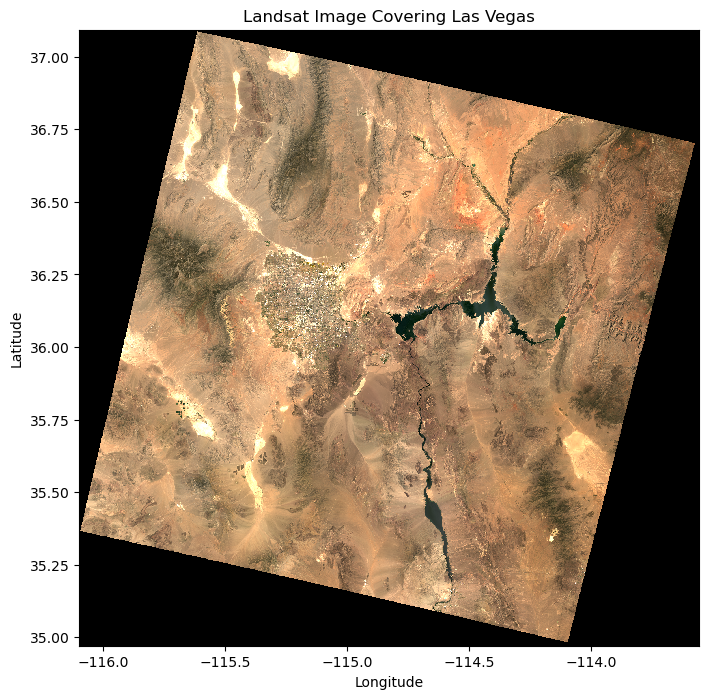

In [30]:
# plot the raster data
plt.figure(figsize = (8,8))
data_reprojected.sel(band=[4,3,2]).plot.imshow(vmin=0,vmax=0.3)
plt.title('Landsat Image Covering Las Vegas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

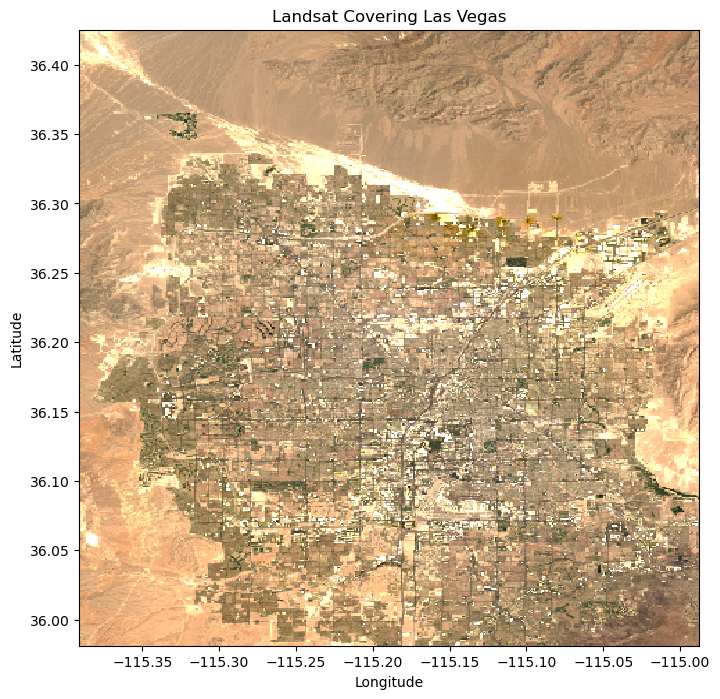

In [33]:
# To visualize the clipped data

plt.figure(figsize=(8,8))
clipped_data.sel(band = [4,3,2]).plot.imshow(vmin=0,vmax=0.3)
plt.title('Landsat Covering Las Vegas')
plt.xlabel("Longitude")
plt.ylabel('Latitude')
plt.show()

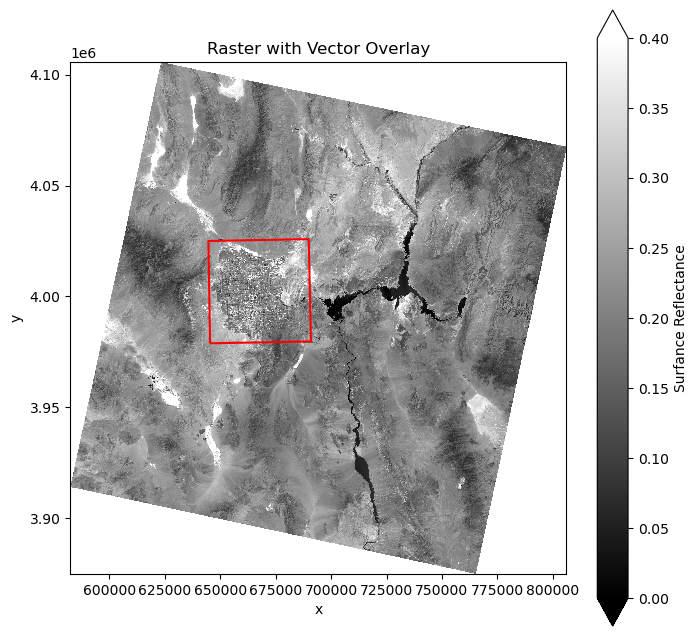

In [37]:
#plot raster with geojson overlay

fig,ax  = plt.subplots(figsize=(8,8))
data.attrs['long_name'] = "Surfance Reflectance"
data.sel(band =4 ).plot.imshow(ax=ax,vmin=0, vmax=0.4,cmap='grey')
bounds.boundary.plot(ax=ax, color = 'red')
plt.title ('Raster with Vector Overlay')
plt.show()